# This is Heart Disease Prediction Project
we are going to predict based on the data whether someone has heart disease or not

* 1- Problem Defination
* 2- Data
* 3- Evaluate
* 4- Feature
* 5- Modelling
* 6- Experimentations

# Step 1 : Problem Defination
> Based on the given Data we need to predict if a patient has Heart Disease or not

# Step 2 :  Data 
> We have data and have loaded it already 

# Step 3 : Evaluate
> In initial stages we need to make sure, if our model gives us the accuracy of 95% 

# Step 4 : Feature
> What features are important , what features columns means what

* 1 Age: age of the patient [years]
* 2 Sex: sex of the patient [M: Male, F: Female]
* 3 ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY:  Asymptomatic]
* 4 RestingBP: resting blood pressure [mm Hg]
* 5 Cholesterol: serum cholesterol [mm/dl]
* 6 FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* 7 RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* 8 MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* 9 ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* 10 Oldpeak: oldpeak = ST [Numeric value measured in depression]
* 11 ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* 12 HeartDisease: output class [1: heart disease, 0: Normal]

# Tools Prepration

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing Models of Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Evaluation Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
# Exploring the Data Initial Stage

# 1- What problem I am going to solve
# 2- What kind of Data I have
# 3- Does this Data have missing values
# 4- Are there any outliers, spurious vectors
# 5- Can we add or remove some of the features

In [3]:
df = pd.read_csv("heart.csv.xls")
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
# check taget count
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

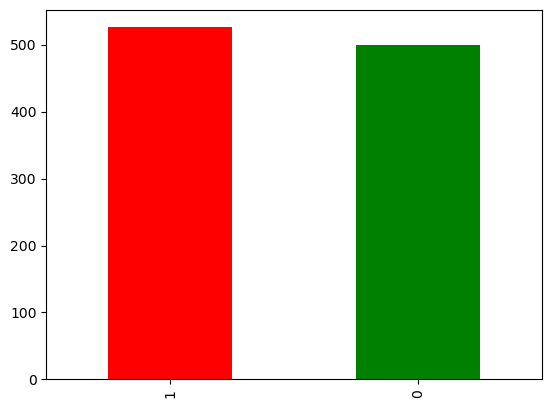

In [7]:
# see target count visualy
df['target'].value_counts().plot(kind='bar',color=['red','green']);

In [8]:
#Check missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# describe the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [11]:
len(df)

1025

In [12]:
713/1025

0.6956097560975609

In [13]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


In [14]:
226/312

0.7243589743589743

In [15]:
300/713

0.42075736325385693

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

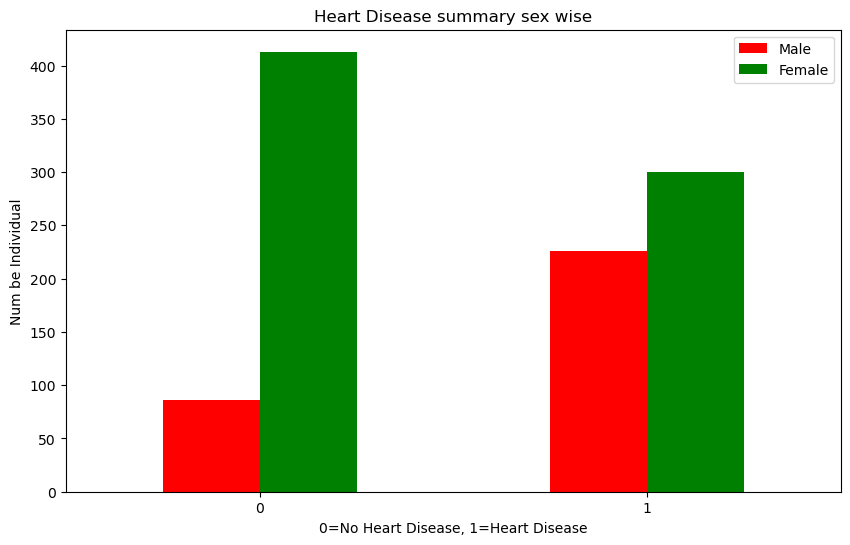

In [16]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red','green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0=No Heart Disease, 1=Heart Disease')
plt.ylabel('Num be Individual')
plt.legend(['Male','Female'])
plt.xticks(rotation=0)

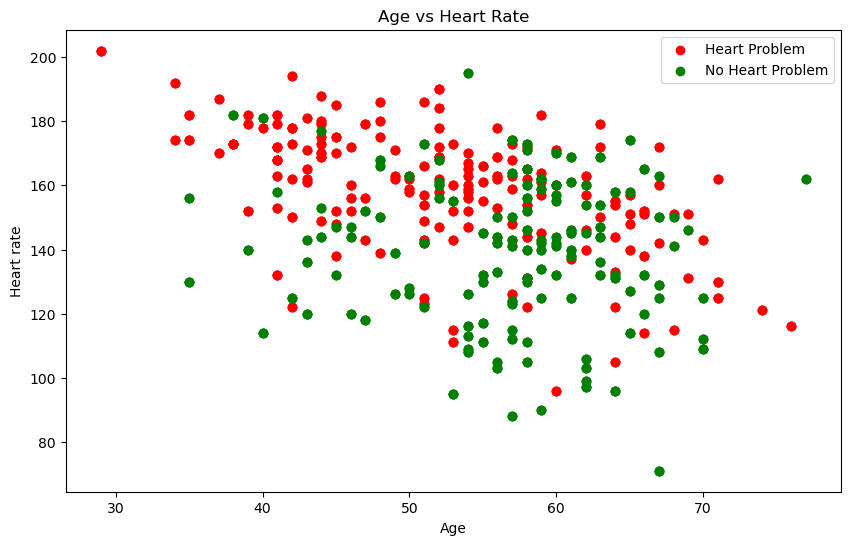

In [17]:
# Finding pattrens in Data using Scatter Plot
plt.figure(figsize=(10,6))
# Create scatter plot
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red");
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="green");
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart rate')
plt.legend(["Heart Problem","No Heart Problem"]);

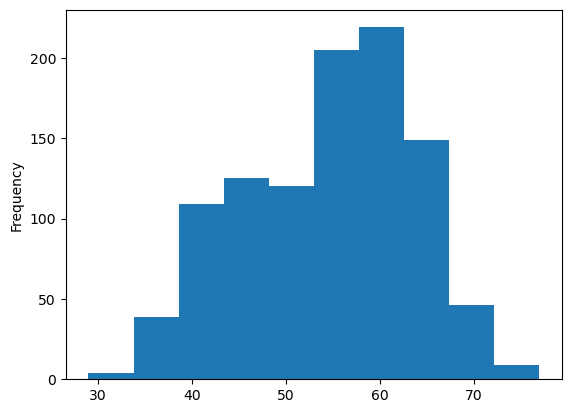

In [18]:
# Create Histogram to see Age Distribution
df.age.plot.hist();

In [19]:
df.cp.value_counts()


0    497
2    284
1    167
3     77
Name: cp, dtype: int64

# cp: chest pain type
*    Value  0 : typical angina : Chest Pain due to decrease blood pressure
*    Value  1 : atypical angina : Chest Pain not related to Heart problem
*    Value  2 : non-anginal pain : Not Heart related
*    Value  3 : asymptomatic : Chest Pain not showing Heart problem


In [20]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


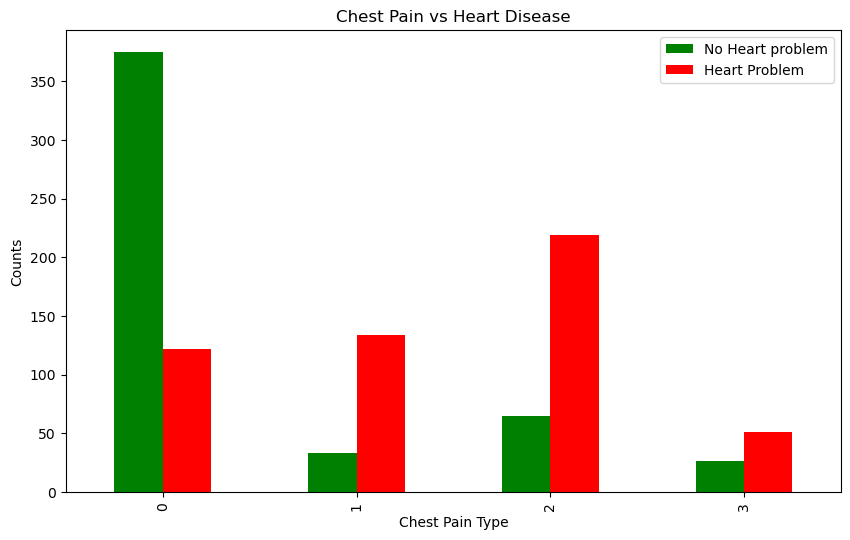

In [21]:
# make the bar chart of chest pain vs target
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['green','red']);
# make some description of the chart
plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend(["No Heart problem","Heart Problem"])

# Correlation Matrix

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


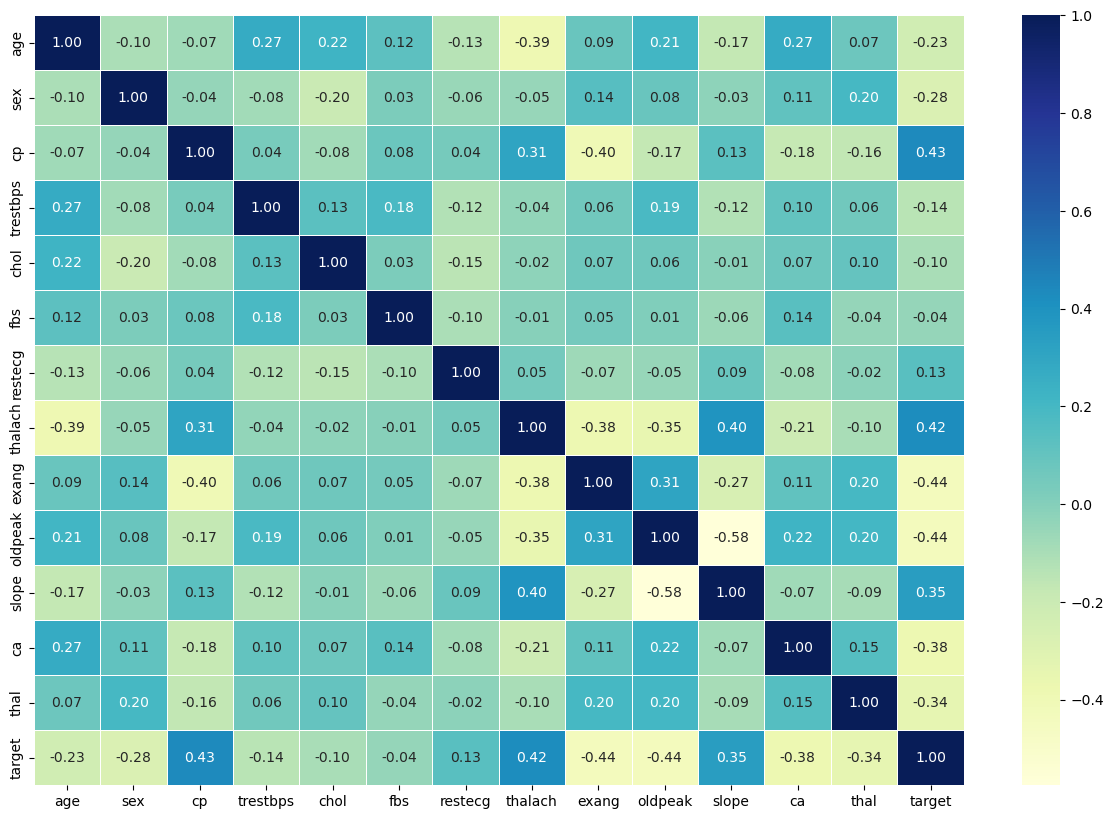

In [24]:
# Lets draw correlation map
cor_map = df.corr()
home,room = plt.subplots(figsize=(15,10))
room = sns.heatmap(cor_map,
                   annot=True,
                   linewidths=0.5,
                   fmt="0.2f",cmap="YlGnBu");


# 1. Problem Defination
     We have a Data and we need to predict heart disease or no heart disease
# 2. Evaluation
     We need 95% Accuracy
# 3. Modelling    
    

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
# Split data set into target and features
X = df.drop("target",axis=1)
y = df['target']

In [27]:
# using randomseed , so that others could produce the same result
np.random.seed(7)
# split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [28]:
len(X)

1025

In [29]:
len(X_train)

820

# The models we are going to use
1. K-Nearesr Neighbours Classifier
2. Random Forest Classifier
3. Logistic Regression

In [30]:
models = {"KNN":KNeighborsClassifier(),
         "RFC":RandomForestClassifier(),
         "LR":LogisticRegression()}

# Create function to evaluate the models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(7)
    # make a Dictionary to save the score
    model_score = {}
    # Looping through
    for name,model in models.items():
        model.fit(X_train,y_train)
        # Evaluate the model and append it score
        model_score[name] = model.score(X_test,y_test)
        
    return model_score        
    

In [31]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/Users/MWA/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7463414634146341, 'RFC': 1.0, 'LR': 0.8780487804878049}

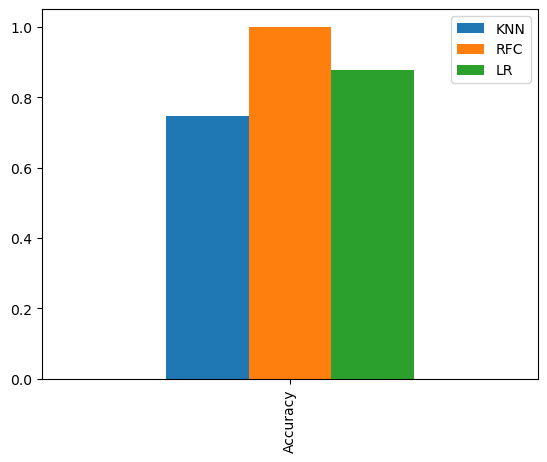

In [32]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.plot.bar();

# Improving and Tuning the Model
## Universal methods used for all classification problems
    
* HyperParameter Tuning
* Features Improving
    
## Advance Level
    
* confusion_matrix
* Cross_validation
* Precision
* Recall
* F1
* Classification Report
* ROC Curve
    

In [33]:
train_score = []
test_score = []
# Create range to be best for n_neighbors
nneighbors = range(1,30)
# KNN instance
KNN = KNeighborsClassifier()
# Looping through the range
for i in nneighbors:
    KNN.set_params(n_neighbors=i)
    # Run the fit for ith value
    KNN.fit(X_train,y_train)
    # Update the training score
    train_score.append(KNN.score(X_train,y_train))
    # Update the test score
    test_score.append(KNN.score(X_test,y_test))

In [34]:
train_score

[1.0,
 0.9951219512195122,
 0.9902439024390244,
 0.9451219512195121,
 0.9182926829268293,
 0.8219512195121951,
 0.7951219512195122,
 0.7914634146341464,
 0.75,
 0.775609756097561,
 0.774390243902439,
 0.7560975609756098,
 0.7536585365853659,
 0.7353658536585366,
 0.751219512195122,
 0.7658536585365854,
 0.7621951219512195,
 0.7463414634146341,
 0.7329268292682927,
 0.7329268292682927,
 0.7292682926829268,
 0.7341463414634146,
 0.7414634146341463,
 0.7378048780487805,
 0.7463414634146341,
 0.7341463414634146,
 0.7414634146341463,
 0.7402439024390244,
 0.7451219512195122]

In [35]:
test_score

[0.9804878048780488,
 0.9414634146341463,
 0.9024390243902439,
 0.8,
 0.7463414634146341,
 0.7219512195121951,
 0.7317073170731707,
 0.7268292682926829,
 0.7414634146341463,
 0.7463414634146341,
 0.7121951219512195,
 0.7170731707317073,
 0.7170731707317073,
 0.7121951219512195,
 0.7463414634146341,
 0.7414634146341463,
 0.7317073170731707,
 0.7024390243902439,
 0.6829268292682927,
 0.6780487804878049,
 0.6731707317073171,
 0.6829268292682927,
 0.7268292682926829,
 0.7268292682926829,
 0.7463414634146341,
 0.7317073170731707,
 0.7317073170731707,
 0.7365853658536585,
 0.7365853658536585]

# Plot the Accuracy Score

Max KNN Score:98.05%


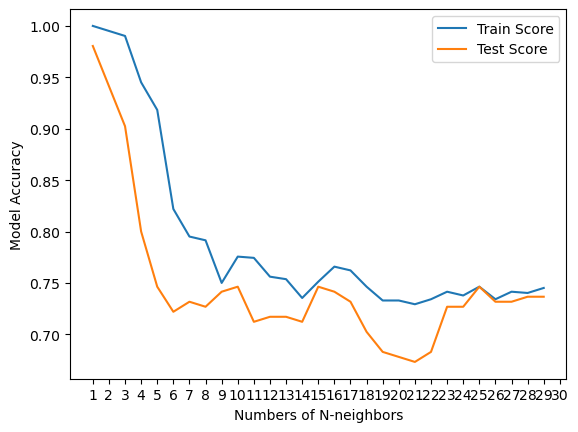

In [36]:
plt.plot(nneighbors,train_score,label="Train Score")
plt.plot(nneighbors,test_score,label="Test Score")
plt.xticks(np.arange(1,31,1))
plt.xlabel('Numbers of N-neighbors')
plt.ylabel('Model Accuracy')
plt.legend()
print(f"Max KNN Score:{max(test_score)*100:0.2f}%")

# HyperParameter Tuning using Randomized Search CV

* LogisticRegression()
* RandomForestClassifier()

In [39]:
LR_HP = {
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]
}
RFC_HP = {
    "n_estimators":np.arange(10,1600,100),
    "max_depth":[None,3,5,6,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

In [42]:
# Tune Logistic Regression
np.random.seed(7)
# Lets use RSCV to tune HP

lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_HP,
                       cv=5,
                       n_iter=20,
                       verbose=True)

# Fit the random HP search model for LR
lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
lr.score(X_test,y_test)

0.8682926829268293

In [44]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [45]:
# Tune Random Forest Classifier
np.random.seed(7)
# Lets use RSCV to tune HP

rfc = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_HP,
                       cv=5,
                       n_iter=20,
                       verbose=True)

# Fit the random HP search model for LR
rfc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [46]:
rfc.best_params_

{'n_estimators': 910,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_depth': 6}

In [47]:
rfc.score(X_test,y_test)

0.9317073170731708

# Hyperparameter tuning using GridSearch CV

In [48]:
# Tune Logistic Regression using GridSearch CV
np.random.seed(7)
# Lets use GSCV to tune HP

lr_gscv = GridSearchCV(LogisticRegression(),
                       param_grid=LR_HP,
                       cv=5,
                       verbose=True)

# Fit the random HP search model for LR
lr_gscv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [49]:
lr_gscv.score(X_test,y_test)

0.8682926829268293

In [50]:
lr_gscv.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# # Tune Random Forest Classifier using GSCV
# np.random.seed(7)
# # Lets use GSCV to tune HP
# rfc_gscv = GridSearchCV(RandomForestClassifier(),
#                        param_gird=RFC_HP,
#                        cv=5,
#                        verbose=True)

# # Fit the random HP search model for LR
# rfc_gscv.fit(X_train,y_train)

# Area Under the Curve

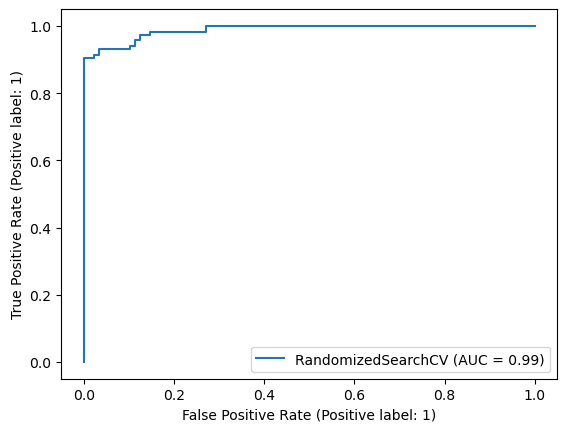

In [57]:
# Ploting the Area under the Curve
rfc.predict(X_test)
RocCurveDisplay.from_estimator(rfc,X_test,y_test);

# Confusion Matrix

In [60]:
y_predict = lr_gscv.predict(X_test)
print(confusion_matrix(y_test,y_predict))

[[ 75  14]
 [ 13 103]]


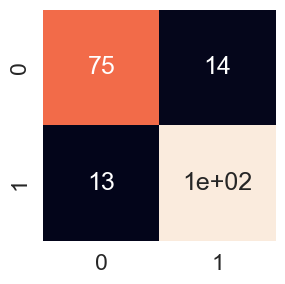

In [61]:
sns.set(font_scale=1.5)
def plot_confusion(y_test,y_predict):
    "This is plot the confusion matrix"
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_predict),
                    annot = True,
                    cbar = False)
    
plot_confusion(y_test,y_predict)    

# Classification Report

In [62]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        89
           1       0.88      0.89      0.88       116

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [63]:
lr = LogisticRegression(C=0.23357214690901212,solver="liblinear")

In [64]:
# Cross Validated Accuracy
cv_accuracy = cross_val_score(lr,X,y,cv=7,scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8438702291092562

In [65]:
# Cross Validated Precision
cv_precision = cross_val_score(lr,X,y,cv=7,scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8105313315767159

In [69]:
# Cross Validated Recall
cv_recall = cross_val_score(lr,X,y,cv=7,scoring="recall")
cv_recall = np.mean(cv_racall)
cv_recall

0.9087218045112782

In [67]:
# Cross Validated f1-score
cv_f1 = cross_val_score(lr,X,y,cv=7,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8564907540515759

# Visualizing the Cross Validated Matrices

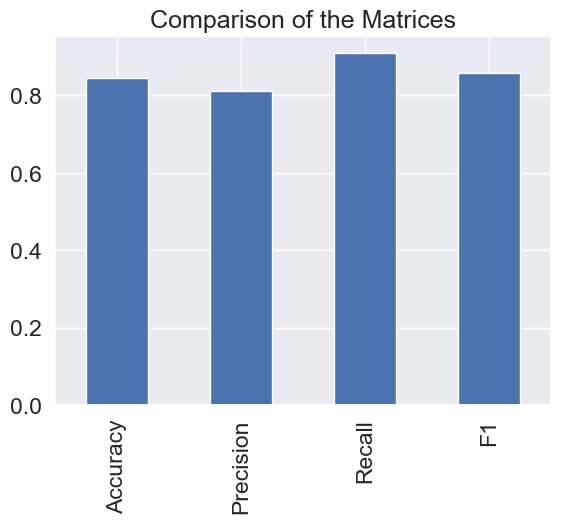

In [72]:
cv_plot = pd.DataFrame({
    "Accuracy":cv_accuracy,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "F1":cv_f1
},index=[0])
cv_plot.T.plot.bar(title="Comparison of the Matrices",
                 legend=False);

# Features Improving

In [73]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [75]:
# Check Coeffiecient
lr.fit(X_train,y_train)
lr.coef_

array([[ 0.00343505, -1.53465996,  0.76772602, -0.01324273, -0.00463385,
        -0.25892336,  0.34158903,  0.03160522, -0.82371075, -0.45637065,
         0.50388389, -0.67012403, -0.72960301]])

In [77]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef

{'age': 0.0034350542580389703,
 'sex': -1.5346599556918248,
 'cp': 0.7677260179114253,
 'trestbps': -0.013242733904848798,
 'chol': -0.004633847344471271,
 'fbs': -0.25892336394522547,
 'restecg': 0.341589027201854,
 'thalach': 0.03160521930817428,
 'exang': -0.8237107471310123,
 'oldpeak': -0.45637065031756235,
 'slope': 0.5038838929691078,
 'ca': -0.6701240331441145,
 'thal': -0.7296030100433525}

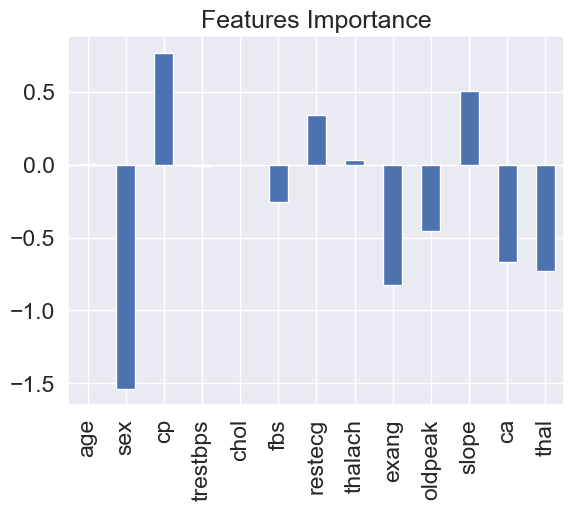

In [78]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title="Features Importance",legend=False);